In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cmasher as cmr
import numpy as np

In [70]:
# Load the Excel file into a pandas DataFrame
df = pd.read_excel('../Outputs/MachineLearning/ML1-PreMon1.xlsx')

# Extract the two columns of data for the variables
x = df['Nd']
y = df['LWP']

<img  width=400 src="../formulas/PLC.png">


In [76]:
# remove zero values
x = x[x != 0]
y = y[y != 0]


In [109]:
#Defining the PieceWise Curve
def fit(Nd,Ndp,Lp,ml,mh):
    return np.where ( Nd < Ndp,
    (Lp)+(ml)*((Nd)-(Ndp)),
    (Lp)+(mh)*((Nd)-(Ndp)))


In [124]:


n=len(x)
yy=np.empty(n)
g=[4.66007190e+01,5.33901749e+01,-1.80734902e-01,2.46605492e-03]
for i in range(n):
    yy[i]=fit((x[i]),g[0],g[1],g[2],g[3])

In [123]:
g=[10,30, -1.02528302e-03, -6.22104716e-04]

#optimisation
from scipy.optimize import curve_fit
c,cov= curve_fit(fit,x.values,(y.values),g,method='lm')
c


array([ 4.66007190e+01,  5.33901749e+01, -1.80734902e-01,  2.46605492e-03])

/var/folders/49/l_0gvcjs3dq8y9y3dm74j_200000gn/T/ipykernel_1634/1675214054.py:8: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100)
/var/folders/49/l_0gvcjs3dq8y9y3dm74j_200000gn/T/ipykernel_1634/1675214054.py:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 100)


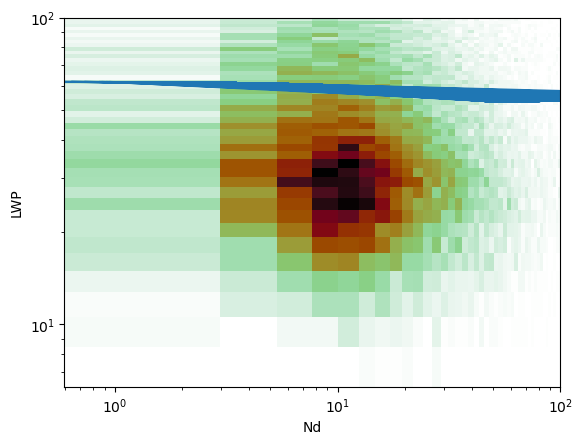

In [133]:

# Plot the joint probability histogram using matplotlib
plt.hist2d((x),(y), bins=(500, 500), cmap='cmr.apple_r',density=True)
plt.plot((x),yy)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Nd')
plt.ylabel('LWP')
plt.xlim(0, 100)
plt.ylim(0, 100)
# plt.yticks([3,10,30,100,300], [3,10,30,100,300])
# plt.xticks([3,10,30,100,300], [3,10,30,100,300])
plt.savefig('JointHist1.png',dpi=300)

plt.show()
